In [1]:
import pandas as pd 
import numpy as np 
import opendatasets as od 
import matplotlib.pyplot as plt 
import seaborn as sns

# text preprocessing 
import re 
import nltk 
import spacy
from spacy import displacy
import warnings

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
spacy.cli.download("en_core_web_sm")
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suel.Abbasi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suel.Abbasi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Suel.Abbasi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Suel.Abbasi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
text = """
    Google, an American multinational technology company, is primarily known for its search engine, 
    which revolutionized access to information on the internet. Founded in 1998 by Larry Page and Sergey Brin, 
    Google has expanded its reach to encompass a vast array of services, including Gmail, Google Maps, Google Drive, and YouTube,
    becoming an integral part of daily life for billions of users worldwide. Beyond its consumer-facing products, 
    Google also plays a significant role in cloud computing, artificial intelligence, and other technological advancements
"""

In [3]:
# Download the spaCy model if not already present

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
doc


    Google, an American multinational technology company, is primarily known for its search engine, 
    which revolutionized access to information on the internet. Founded in 1998 by Larry Page and Sergey Brin, 
    Google has expanded its reach to encompass a vast array of services, including Gmail, Google Maps, Google Drive, and YouTube,
    becoming an integral part of daily life for billions of users worldwide. Beyond its consumer-facing products, 
    Google also plays a significant role in cloud computing, artificial intelligence, and other technological advancements

In [4]:
# step 1: Part-of-Speech (POS) tagging
pos_tags = [(token.text, token.pos_) for token in doc]
print("Part-of-Speech Tags:")
for token, pos in pos_tags:
    print(f"{token}: {pos}")

Part-of-Speech Tags:

    : SPACE
Google: PROPN
,: PUNCT
an: DET
American: ADJ
multinational: ADJ
technology: NOUN
company: NOUN
,: PUNCT
is: AUX
primarily: ADV
known: VERB
for: ADP
its: PRON
search: NOUN
engine: NOUN
,: PUNCT

    : SPACE
which: PRON
revolutionized: VERB
access: NOUN
to: ADP
information: NOUN
on: ADP
the: DET
internet: NOUN
.: PUNCT
Founded: VERB
in: ADP
1998: NUM
by: ADP
Larry: PROPN
Page: PROPN
and: CCONJ
Sergey: PROPN
Brin: PROPN
,: PUNCT

    : SPACE
Google: PROPN
has: AUX
expanded: VERB
its: PRON
reach: NOUN
to: PART
encompass: VERB
a: DET
vast: ADJ
array: NOUN
of: ADP
services: NOUN
,: PUNCT
including: VERB
Gmail: PROPN
,: PUNCT
Google: PROPN
Maps: PROPN
,: PUNCT
Google: PROPN
Drive: PROPN
,: PUNCT
and: CCONJ
YouTube: PROPN
,: PUNCT

    : SPACE
becoming: VERB
an: DET
integral: ADJ
part: NOUN
of: ADP
daily: ADJ
life: NOUN
for: ADP
billions: NOUN
of: ADP
users: NOUN
worldwide: ADV
.: PUNCT
Beyond: ADP
its: PRON
consumer: NOUN
-: PUNCT
facing: VERB
products: NOUN


In [5]:
# step 2: Named Entity Recognition (NER)
entities = [(ent.text, ent.label_) for ent in doc.ents]
print("\nNamed Entities:")
for entity, label in entities:
    print(f"{entity}: {label}")


Named Entities:
American: NORP
1998: DATE
Larry Page: PERSON
Sergey Brin: PERSON
Google: ORG
Gmail: PERSON
YouTube: ORG
daily: DATE
billions: CARDINAL
Google: ORG


# Preprocessing?
No, spaCy handles most of it internally. 

When we run nlp(text), spaCy already:
- lowercase when needed (context-aware)
- remove extra spaces
- tokenize the text properly
- handle punctuation boundaries
- applies pre-trained POS and NER models out-of-the-box

We DO NOT NEED to :
- Remove stopwords
- Lowercase everything
- Lemma or Stemm
- Manually Tokenize

We can do some light preprocessing in cases like

- Sloppy or measure user input
- Raw scrapped data 
- custom domain
- spacy failing on known edge cases

**Best Practices for Learning--Keep the text raw when learning POS & NER - this helps us to understand how good the model is before introducing manual preprocessing**


In [6]:
# NER MODEL
# Visualize Named Entities using displacy
plt.figure(figsize=(8, 5))
displacy.render(doc, style="ent")   
plt.show()


<Figure size 800x500 with 0 Axes>

In [7]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

from dotenv import load_dotenv
import os

import warnings
warnings.filterwarnings("ignore")

import os

In [8]:
# Load environment variables from .env file
load_dotenv()

kaggle_username = os.getenv('KAGGLE_USERNAME')
kaggle_key = os.getenv('KAGGLE_KEY')    

os.environ['KAGGLE_USERNAME'] = kaggle_username
os.environ['KAGGLE_KEY'] = kaggle_key

od.download('https://www.kaggle.com/competitions/tweet-sentiment-extraction/overview')

Skipping, found downloaded files in ".\tweet-sentiment-extraction" (use force=True to force download)


In [9]:
train = pd.read_csv('./tweet-sentiment-extraction/train.csv')
test = pd.read_csv('./tweet-sentiment-extraction/test.csv')
ss = pd.read_csv('./tweet-sentiment-extraction/sample_submission.csv')

In [10]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [11]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (27481, 4)
Test shape: (3534, 3)


In [12]:
train.dropna(inplace=True   )

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


# EDA

In [15]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,6f7127d9d7,All this flirting going on - The ATG smiles...,good,neutral
freq,1,1,199,11117


In [16]:
# check the distribution of sentiment labels
print(train.sentiment.unique().tolist())
print('--'*10)
print(train.sentiment.value_counts())

['neutral', 'negative', 'positive']
--------------------
sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64


In [17]:
print(train.groupby('sentiment').count()['text'].sort_values(ascending=False))

sentiment
neutral     11117
positive     8582
negative     7781
Name: text, dtype: int64


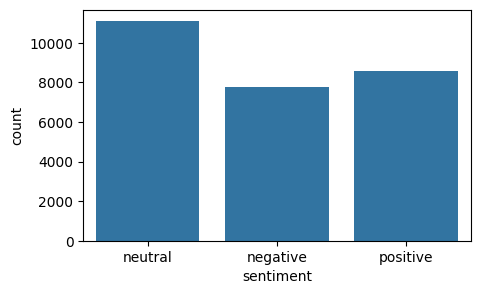

In [18]:
plt.figure(figsize=(5,3))
sns.countplot(x='sentiment',data=train)
plt.show()

# What do we currently Know About our Data:
Before starting let's look at some things that we already know about the data and will help us in gaining more new insights:

1. We Know that selected_text is a subset of text
2. We know that selected_text contains only one segment of text,i.e,It does not jump between two sentences.For Eg:- If text is 'Spent the entire morning in a meeting w/ a vendor, and my boss was not happy w/ them. Lots of fun. I had other plans for my morning' The selected text can be 'my boss was not happy w/ them. Lots of fun' or 'Lots of fun' but cannot be 'Morning,vendor and my boss,
3. Thanks to this discussion:https://www.kaggle.com/c/tweet-sentiment-extraction/discussion/138520 We know that neutral tweets have a jaccard similarity of 97 percent between text and selected_text
4. Also as discussed here https://www.kaggle.com/c/tweet-sentiment-extraction/discussion/138272 ,there are rows where selected_text starts from between the words and thus selected_texts dont always make sense and since we do not know whether the output of test set contain these descrepancies or not ,we are not sure that preprocessing and removing punctuations would be a good idea or not

# Generating Meta-Features¶

In the previous versions of this notebook,I used Number of words in selected text and main text ,Length of words in text and selected as main meta features,but in the context of this competition where we have to predict selected_text which is a subset of text, more useful features to generate would be :-

Difference In Number Of words of Selected_text and Text
Jaccard Similarity Scores between text and Selected_text
Thus it will not be useful for us to generate features we used before as they are of no importance here

For what who don't know what Jaccard Similarity is : https://www.geeksforgeeks.org/find-the-jaccard-index-and-jaccard-distance-between-the-two-given-sets/

In [19]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [20]:
results_jaccard=[]

for ind , row in train.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

In [21]:
jaccard = pd.DataFrame(results_jaccard,columns=["text","selected_text","jaccard_score"])
train = train.merge(jaccard,how='outer')
train.sample(5)

,textID,text,selected_text,sentiment,jaccard_score
16556,0556dbe899,Just passed a wrecked car hoping everyone got...,hoping,positive,0.047619
1679,6a3f85b641,Foto!,Foto!,neutral,1.000000
19316,7bf530de4a,This has been a dismal week.,dismal,negative,0.166667
15565,c5f92f60d2,I`m Back and I see I missed Truck and Fish on,missed,negative,0.111111
3993,93b6f1ee3e,No kidding there! Ugh ... One thing I know fo...,No kidding there! Ugh,negative,0.190476


In [22]:
#Number Of words in Selected Text
train['Num_words_ST'] = train['selected_text'].apply(lambda x:len(str(x).split())) 

#Number Of words in main text
train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split())) 

#Difference in Number of words text and Selected Text
train['difference_in_words'] = train['Num_word_text'] - train['Num_words_ST'] 

In [23]:
train.sample(5)

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
11532,772420f0e0,: psh...didn`t even pay for me though,: psh...didn`t even pay for me though,negative,1.000000,7,7,0
15120,a4a5de0baf,I loved johnny carson now I`m going to hate se...,hate,negative,0.076923,1,13,12
1056,3746fe8192,7pm? So early. Dat`s 4pm my time.,7pm? So early. Dat`s 4pm my time.,neutral,1.000000,7,7,0
593,4e42307bc0,it`s an app to finally face the truth: you l...,h: you lack time,negative,0.086957,4,22,18
5888,a4f7c6001a,ah. I lived all over the Baltimore/DC suburbs...,ah. I lived all over the Baltimore/DC suburbs ...,neutral,1.000000,21,21,0


Lets' look into the distribution of meta features

In [24]:
hist_data = [train['Num_words_ST'],train['Num_word_text']]

group_labels = ['Selected_Text', 'Text']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'autobinx': False,
              'histnorm': 'probability density',
              'legendgroup': 'Selected_Text',
              'marker': {'color': 'rgb(31, 119, 180)'},
              'name': 'Selected_Text',
              'opacity': 0.7,
              'type': 'histogram',
              'x': {'bdata': ('AQIDBQMCBgIFAgMPDAoQCQMDAwYGAQ' ... 'QHBAQGAhMMARQCBxYDBQoLAwsCBRIS'),
                    'dtype': 'i1'},
              'xaxis': 'x',
              'xbins': {'end': 33.0, 'size': 1.0, 'start': 1.0},
              'yaxis': 'y'},
             {'autobinx': False,
              'histnorm': 'probability density',
              'legendgroup': 'Text',
              'marker': {'color': 'rgb(255, 127, 14)'},
              'name': 'Text',
              'opacity': 0.7,
              'type': 'histogram',
              'x': {'bdata': ('BQUIBQoOBgUQDQQQDAsSCQYVAwYGBw' ... 'QWBRYGEhMMGxQWFhYDEQwLFAsVDRIS'),
                    'dtype': 'i1'},
              'xaxis': 'x',
              'xbins': {'end': 33.0, 'size': 1.0, 'start': 1.0},
              'yaxis': 'y'},
             {'legendgroup': 'Selected_Text',
              'marker': {'color': 'rgb(31, 119, 180)', 'symbol': 'line-ns-open'},
              'mode': 'markers',
              'name': 'Selected_Text',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('AQIDBQMCBgIFAgMPDAoQCQMDAwYGAQ' ... 'QHBAQGAhMMARQCBxYDBQoLAwsCBRIS'),
                    'dtype': 'i1'},
              'xaxis': 'x',
              'y': [Selected_Text, Selected_Text, Selected_Text, ...,
                    Selected_Text, Selected_Text, Selected_Text],
              'yaxis': 'y2'},
             {'legendgroup': 'Text',
              'marker': {'color': 'rgb(255, 127, 14)', 'symbol': 'line-ns-open'},
              'mode': 'markers',
              'name': 'Text',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('BQUIBQoOBgUQDQQQDAsSCQYVAwYGBw' ... 'QWBRYGEhMMGxQWFhYDEQwLFAsVDRIS'),
                    'dtype': 'i1'},
              'xaxis': 'x',
              'y': [Text, Text, Text, ..., Text, Text, Text],
              'yaxis': 'y2'}],
    'layout': {'autosize': False,
               'barmode': 'overlay',
               'height': 700,
               'hovermode': 'closest',
               'legend': {'traceorder': 'reversed'},
               'paper_bgcolor': 'LightSteelBlue',
               'template': '...',
               'title': {'text': 'Distribution of Number Of words'},
               'width': 900,
               'xaxis': {'anchor': 'y2', 'domain': [0.0, 1.0], 'zeroline': False},
               'yaxis': {'anchor': 'free', 'domain': [0.35, 1], 'position': 0.0},
               'yaxis2': {'anchor': 'x', 'domain': [0, 0.25], 'dtick': 1, 'showticklabels': False}}
})

1. The number of words plot is really interesting ,the tweets having number of words greater than 25 are very less and thus the number of words distribution plot is right skewed
2. Selected Text is generally a single text 

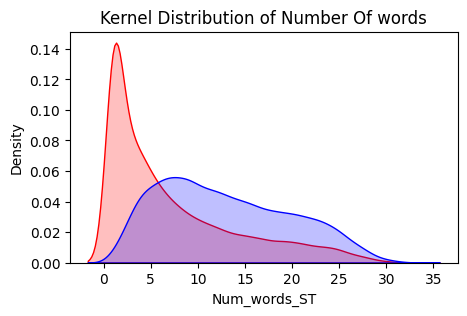

In [25]:
plt.figure(figsize=(5,3))
p1=sns.kdeplot(train['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(train['Num_word_text'], shade=True, color="b")

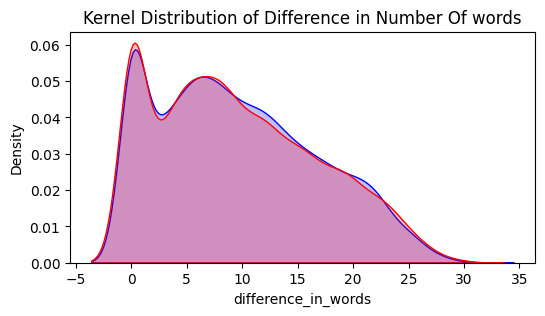

In [26]:
# Now It will be more interesting to see the differnce in number of words and jaccard_scores across different Sentiments
plt.figure(figsize=(6,3))
p1=sns.kdeplot(train[train['sentiment']=='positive']['difference_in_words'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(train[train['sentiment']=='negative']['difference_in_words'], shade=True, color="r")

<Axes: xlabel='difference_in_words'>

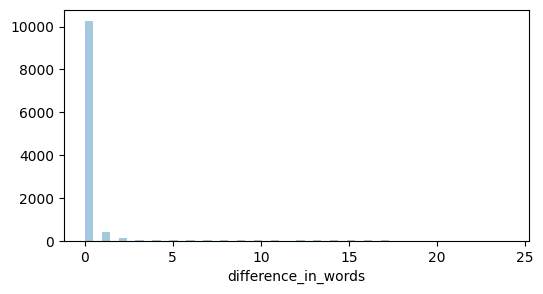

In [27]:
plt.figure(figsize=(6,3))
sns.distplot(train[train['sentiment']=='neutral']['difference_in_words'],kde=False)

I was not able to plot kde plot for neutral tweets because most of the values for difference in number of words were zero. We can see it clearly now ,if we had used the feature in the starting we would have known that text and selected text are mostly the same for neutral tweets,thus its always important to keep the end goal in mind while performing EDA

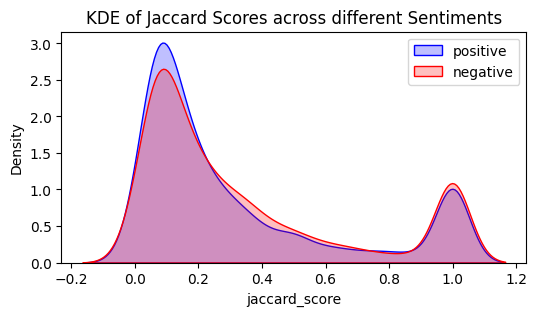

In [28]:
plt.figure(figsize=(6,3))
p1=sns.kdeplot(train[train['sentiment']=='positive']['jaccard_score'], shade=True, color="b").set_title('KDE of Jaccard Scores across different Sentiments')
p2=sns.kdeplot(train[train['sentiment']=='negative']['jaccard_score'], shade=True, color="r")
plt.legend(labels=['positive','negative'])

<Axes: xlabel='jaccard_score'>

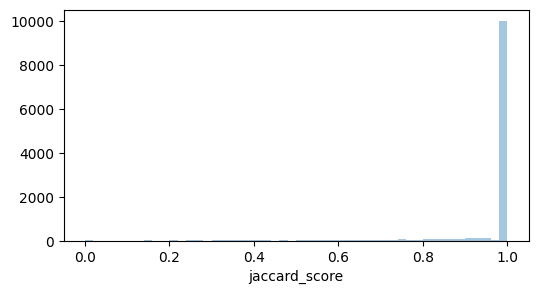

In [29]:
plt.figure(figsize=(6,3))
sns.distplot(train[train['sentiment']=='neutral']['jaccard_score'],kde=False)

#### We can see some interesting trends here:

1. Positive and negative tweets have high kurtosis and thus values are concentrated in two regions narrow and high density
2. Neutral tweets have a low kurtosis value and their is bump in density near values of 1


##### For those who don't know :

1. Kurtosis is the measure of how peaked a distribution is and how much spread it is around that peak
2. Skewness measures how much a curve deviates from a normal distribution


#### Conclusion Of EDA
We can see from the jaccard score plot that there is peak for negative and positive plot around score of 1 .That means there is a cluster of tweets where there is a high similarity between text and selected texts ,if we can find those clusters then we can predict text for selected texts for those tweets irrespective of segment

In [30]:
#  Let's see if we can find those clusters,one interesting idea would be to check tweets which have number of words lesss than 3 in text, 
# because there the text might be completely used as text

In [31]:
k = train[train['Num_word_text']<=2]
k.sample()

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
1506,a99010e300,Congratulations xo,Congratulations,positive,0.5,1,2,1


In [32]:
k.groupby('sentiment')['jaccard_score'].mean().sort_values(ascending=False)

sentiment
neutral     0.977805
negative    0.788580
positive    0.765700
Name: jaccard_score, dtype: float64

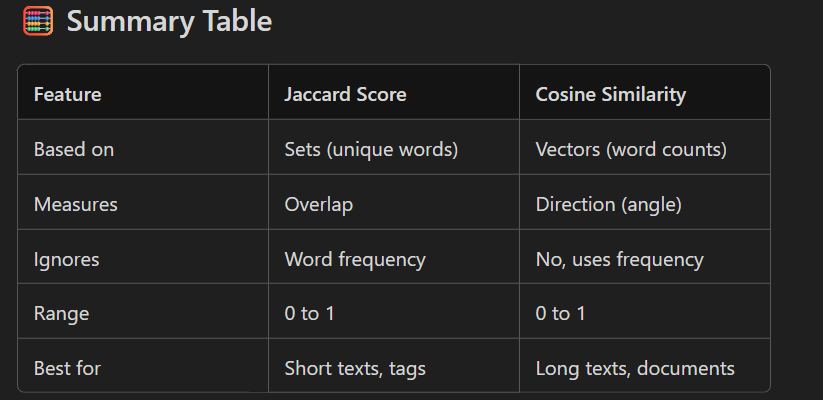

In [33]:
# We can see that there is similarity between text and selected text .Let's have closer look
k[k['sentiment']=='positive'].sample(10)

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
6815,0dbaca8e07,goood,goood,positive,1.0,1,1,0
4765,02669ef6ac,Thanks PP!,Thanks,positive,0.5,1,2,1
13622,63aedbe9fe,Goooooodmorning,Goooooodmorning,positive,1.0,1,1,0
4772,433ac3cf89,Thanks bb.,Thanks,positive,0.5,1,2,1
13617,352613631e,Goood Afternooon,Goood,positive,0.5,1,2,1
14086,49a942e9b1,Happy birthday.,Happy birthday.,positive,1.0,2,2,0
1783,b647c915b0,Goooood Luck!,Goooood,positive,0.5,1,2,1
13594,a252d170ca,Goodmorning World,Goodmorning,positive,0.5,1,2,1
5141,a9069500b5,Ur welcome,Ur welcome,positive,1.0,2,2,0
4881,1e6063981e,Thanks.,Thanks.,positive,1.0,1,1,0


Thus its clear that most of the times , text is used as selected text.We can improve this by preprocessing the text which have word length less than 3.We will remember this information and use it in model building

In [34]:
# cleaning the corpus 

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

train['text'] = train['text'].apply(lambda x: clean_text(x))    
train['selected_text'] = train['selected_text'].apply(lambda x: clean_text(x))

In [35]:
def remove_stopwords(text):
    '''Remove stop words.'''
    stop_words = set(stopwords.words('english') + ['im'])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
   
train['temp_list'] = train['selected_text'].apply(lambda x: remove_stopwords(x))

In [36]:
train.sample(3)

,textID,text,selected_text,sentiment,jaccard_score,Num_words_ST,Num_word_text,difference_in_words,temp_list
12986,c2ba023e06,excited for today but still so much to do,excited,positive,0.111111,1,9,8,excited
5092,e31563f420,trickery no just exasperation at seeing pri...,d uglier,negative,0.047619,2,20,18,uglier
25383,fe0dc960ea,mum just made me cry coz she said something so...,mum just made me cry coz she said something so...,positive,1.000000,22,22,0,mum made cry coz said something sweet love muc...


In [37]:
top = Counter([item for sublist in train.temp_list for item in sublist.split()])

temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,good,1251
1,day,1058
2,love,909
3,happy,852
4,like,774
5,get,772
6,dont,765
7,go,700
8,cant,613
9,work,612


In [38]:
# Most common words Sentiments Wise

In [39]:
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

In [40]:
# MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist.split()])
temp_positive = pd.DataFrame(top.most_common(10))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,good,826
1,happy,730
2,love,697
3,day,456
4,thanks,439
5,great,364
6,fun,287
7,nice,267
8,mothers,259
9,hope,245


In [41]:
# MosT common Negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist.split()])
temp_positive = pd.DataFrame(top.most_common(10))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,miss,358
1,sad,343
2,sorry,300
3,bad,246
4,hate,230
5,dont,221
6,cant,201
7,sick,166
8,like,162
9,sucks,159


In [42]:
# MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist.split()])
temp_positive = pd.DataFrame(top.most_common(10))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,get,612
1,go,569
2,day,492
3,dont,482
4,going,472
5,work,467
6,like,445
7,got,441
8,today,427
9,lol,427


In [43]:
train['temp_list1'] = train['text'].apply(lambda x:str(x)) #List of words in every row for text
train['temp_list1'] = train['temp_list1'].apply(lambda x:remove_stopwords(x)) #Removing Stopwords

In [44]:
top = Counter([item for sublist in train['temp_list1'] for item in sublist.split()])
temp = pd.DataFrame(top.most_common(25))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,day,2044
1,good,1549
2,get,1426
3,like,1346
4,go,1267
5,dont,1200
6,love,1122
7,work,1112
8,today,1096
9,going,1096


In [45]:
raw_text = [word for word_list in train['temp_list1'] for word in word_list.split()]
raw_text

['really',
 'oh',
 'sorry',
 'yall',
 'lol',
 'beckett',
 'thanks',
 'much',
 'youll',
 'missed',
 'bring',
 'back',
 'keychain',
 'get',
 'lit',
 'good',
 'morning',
 'pretty',
 'outside',
 'today',
 'love',
 'guys',
 'get',
 'australia',
 'december',
 'birthday',
 'soooooooo',
 'happened',
 'power',
 'forreal',
 'bracelet',
 'broke',
 'today',
 'followfriday',
 'thank',
 'much',
 'behind',
 'still',
 'half',
 'overwhelming',
 'lead',
 'strawberry',
 'lemonade',
 'husband',
 'voted',
 'banana',
 'fosters',
 'tho',
 'go',
 'get',
 'em',
 'lol',
 'like',
 'fridays',
 'generally',
 'class',
 'extended',
 'today',
 'starving',
 'x',
 'haha',
 'op',
 'ive',
 'dying',
 'expensive',
 'little',
 'sizes',
 'lmao',
 'yes',
 'get',
 'excited',
 'lol',
 'mc',
 'john',
 'sim',
 'posit',
 'yr',
 'passed',
 'softees',
 'stranded',
 'without',
 'warren',
 'tea',
 'tech',
 'spec',
 'kaching',
 'feel',
 'left',
 'alone',
 'azlol',
 'shiv',
 'place',
 'slowly',
 'hope',
 'wow',
 'awesome',
 'andre',
 'g

In [46]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train.sentiment != sentiment]['temp_list1']:
        for word in item.split():
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['temp_list1']:
        for word in item.split():
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [47]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,congratulations,29
1,thnx,10
2,appreciated,8
3,greetings,7
4,shared,7
5,presents,7
6,blessings,6
7,mothersday,6
8,honored,6
9,goood,6


In [48]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,ache,12
1,suffering,9
2,saddest,7
3,allergic,7
4,pissing,7
5,cramps,7
6,dealing,6
7,noes,6
8,sob,6
9,devastated,6


In [49]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


,words,count
0,settings,9
1,explain,7
2,hiya,6
3,mite,6
4,pr,5
5,guessed,5
6,reader,5
7,pfft,5
8,fathers,5
9,bucks,5


In [50]:
# modelling the problem as NER
df_train = pd.read_csv('./tweet-sentiment-extraction/train.csv')
df_test = pd.read_csv('./tweet-sentiment-extraction/test.csv')
df_submission = pd.read_csv('./tweet-sentiment-extraction/sample_submission.csv')

In [51]:
df_train['Num_words_text'] = df_train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main Text in train set

In [52]:
df_train = df_train[df_train['Num_words_text']>=3]

In [53]:
def save_model(output_dir, nlp, new_model_name):
    ''' This Function Saves model to 
    given output directory'''
    
    output_dir = f'../working/{output_dir}'
    if output_dir is not None:        
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

def get_model_out_path(sentiment):
    '''
    Returns Model output path
    '''
    model_out_path = None
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    return model_out_path
        
def get_training_data(sentiment):
    '''
    Returns Trainong data in the format needed to train spacy NER
    '''
    train_data = []
    for index, row in df_train.iterrows():
        if row.sentiment == sentiment:
            selected_text = row.selected_text
            text = row.text
            start = text.find(selected_text)
            end = start + len(selected_text)
            train_data.append((text, {"entities": [[start, end, 'selected_text']]}))
    return train_data

In [ ]:
# pass model = nlp if you want to train on top of existing model 
from spacy.training.example import Example
def train(train_data, output_dir, n_iter=20, model=None):
    """Load the model, set up the pipeline and train the entity recognizer."""
    ""
    if model is not None:
        nlp = spacy.load(output_dir)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")
    
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe('ner', last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")
    
    # add labels
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # sizes = compounding(1.0, 4.0, 1.001)
        # batch up the examples using spaCy's minibatch
        if model is None:
            nlp.begin_training()
        else:
            nlp.resume_training()

        for itn in tqdm(range(n_iter)):
            random.shuffle(train_data)
            batches = minibatch(train_data, size=compounding(4.0, 500.0, 1.001)) 
            losses = {}
            for batch in batches:
                examples = []
                for k in batch:
                    text, annotations = k
                    doc = nlp.make_doc(text)
                    example = Example.from_dict(doc, annotations)
                    examples.append(example)
                    nlp.update(
                        examples,
                        drop=0.5,
                        losses=losses,
                    )
                # print("Losses", losses)

    save_model(output_dir, nlp, 'st_ner')


In [94]:
sentiment = 'positive'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)
# For DEmo Purposes I have taken 3 iterations you can train the model as you want
train(train_data, model_path, n_iter=3, model=None)

Created blank 'en' model


100%|██████████| 3/3 [42:58<00:00, 859.59s/it]

Saved model to ../working/models/model_pos


In [95]:
sentiment = 'negative'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(train_data, model_path, n_iter=3, model=None)

Created blank 'en' model


100%|██████████| 3/3 [47:19<00:00, 946.50s/it]

Saved model to ../working/models/model_neg


In [96]:
def predict_entities(text, model):
    doc = model(text)
    ent_array = []
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0]: ent_array[0][1]] if len(ent_array) > 0 else text
    return selected_text

In [97]:
selected_texts = []
MODELS_BASE_PATH = '../input/tse-spacy-model/models/'

if MODELS_BASE_PATH is not None:
    print("Loading Models  from ", MODELS_BASE_PATH)
    model_pos = spacy.load(MODELS_BASE_PATH + 'model_pos')
    model_neg = spacy.load(MODELS_BASE_PATH + 'model_neg')
        
    for index, row in df_test.iterrows():
        text = row.text
        output_str = ""
        if row.sentiment == 'neutral' or len(text.split()) <= 2:
            selected_texts.append(text)
        elif row.sentiment == 'positive':
            selected_texts.append(predict_entities(text, model_pos))
        else:
            selected_texts.append(predict_entities(text, model_neg))
        
df_test['selected_text'] = selected_texts

Loading Models  from  ../input/tse-spacy-model/models/


OSError: [E050] Can't find model '../input/tse-spacy-model/models/model_pos'. It doesn't seem to be a Python package or a valid path to a data directory.